# Tabla de pruebas

$$ -\Delta(x,y) = R_{1}\left(1 - \frac{|\xi_{+}|^{2}}{R_{1}^{2}} \right)^{1/2} - R_{2}\left(1 - \frac{|\xi_{+}|^{2}}{R_{2}^{2}} \right)^{1/2} + R_{2}\left(1 - \frac{|\xi_{-}|^{2}}{R_{2}^{2}} \right)^{1/2} - R_{1}\left(1 - \frac{|\xi_{-}|^{2}}{R_{1}^{2}} \right)^{1/2}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget

In [2]:
def position_points(array):
    fig, ax = plt.subplots()
    ax.scatter(array[:,:-1], array[:,1:], alpha=.7, color='black', s = 80)
    ax.axis('equal')
    plt.show()

In [3]:
def len_draw(r1, r2, width):
    
    r2 = -r2
    # equation 1
    
    if r1 <= r2:
        # len 1
        x1   = np.linspace(-(r1),0, 500)
        eq1  = np.sqrt( (r1 ** 2) - (x1 ** 2) )
        
        # len 2
        h2   = -np.sqrt( (r2 ** 2) - (r1 ** 2))
        x2   = np.linspace(0,r2+h2, 500)
        eq2  = np.sqrt( (r2 ** 2) - ( (x2 - h2) ** 2) )
    else:
        # len 1
        h1   = np.sqrt( (r1 ** 2) - (r2 ** 2))
        x1   = np.linspace(-r1+h1,0, 500)
        eq1  = np.sqrt( (r1 ** 2) - ( (x1 - h1) ** 2) )
        
        # len 2
        x2   = np.linspace(0,r2, 500)
        eq2  = np.sqrt( (r2 ** 2) - (x2 ** 2) )
        
    # simetric equation 1
    eq12 = np.concatenate(( np.flip(eq1), -eq1 ))
    x12  = np.concatenate(( np.flip(x1), x1 ))
    
    # simetric equation 2
    eq21 = np.concatenate(( np.flip(eq2), -eq2 ))
    x21  = np.concatenate(( np.flip(x2), x2 ))
    
    # draw
    fig, ax = plt.subplots()
    ax.axis('equal')
    ax.fill(x12, eq12,facecolor= '#5072A7', alpha = 0.5, label = 'R1')
    ax.fill(x21, eq21,facecolor= '#CD5C5C', alpha = 0.5, label = 'R2')
    ax.legend()
    plt.show()

In [4]:
def matrix_points(p):
    #x son los puntos sobre el eje x
    x = list(np.array(p)[:,0])
    y = list(np.array(p)[:,1])
    
    #subm_1 es la submatriz compuesta de vectores fila de x
    subm_1x = np.array(x*len(x)).reshape(len(x),len(x))
    subm_1y = np.array(y*len(y)).reshape(len(y),len(y))
    
    #subm_2 es la submatriz compuesta de vectores columna repitiendo x
    subm_2x = np.transpose(subm_1x)
    subm_2y = np.transpose(subm_1y)
    
    #xi_a es el promedio de cada punto en x con cada uno de los demas puntos
    xi_a = (subm_1x+subm_2x)/2
    eta_a = (subm_1y+subm_2y)/2
    
    #xi_d es la distancia de cada punto con cada uno de los demas puntos
    xi_d = subm_2x-subm_1x
    eta_d = subm_2y-subm_1y
    
    #vectores de las matrices xi_a y xi_d
    xi_av = list(xi_a.reshape(1,len(xi_a)**2))
    xi_dv = list(xi_d.reshape(1,len(xi_d)**2))
    eta_av = list(eta_a.reshape(1,len(eta_a)**2))
    eta_dv = list(eta_d.reshape(1,len(eta_d)**2))
    
    #matriz con todas las parejas de puntos xi_a y xi_d
    xi_m = np.transpose(np.array(xi_av+xi_dv+eta_av+eta_dv)).reshape(len(x),len(x),4)
    return xi_m

In [5]:
def GeometricPotencial_3D_00_reducido(xa, xi_a, xi_d, ya, eta_a, eta_d, za, wa, c, R1, R2):
    #constantes
    pic = 1 / ((4*np.pi) ** 2)
    k = ((2*np.pi)/wa)
    n = 1.5 #refractive index
    
    xi_p, xi_n = xi_a+(xi_d)/2, xi_a-(xi_d)/2
    eta_p, eta_n = eta_a+(eta_d)/2, eta_a-(eta_d)/2
    
    normPlus  = (xi_p**2) + (eta_p**2)
    normMinus = (xi_n**2) + (eta_n**2)
    
    
    # fase dentro y fuera de la lente para +
    if (normPlus > (R1 ** 2)) or (normPlus > (R2 ** 2)):
        phase_plus = 0
    else:
        phase_plus  = R1 * np.sqrt(1 - (normPlus / (R1 ** 2)) + 0j) - R2 * np.sqrt(1 - (normPlus / (R2 ** 2)) + 0j)
        
    # fase dentro y fuera de la lente para -
    if (normMinus > (R1 ** 2)) or (normMinus > (R2 ** 2)):
        phase_minus = 0
    else:
        phase_minus = R1 * np.sqrt(1 - (normMinus / (R1 ** 2)) + 0j) - R2 * np.sqrt(1 - (normMinus / (R2 ** 2)) + 0j)
    
    phase = np.exp(1j*(n-1)*k*phase_plus*c) * np.exp(-1j*(n-1)*k*phase_minus*c)
    
    #distancia s
    s_1 = np.sqrt(((xa-xi_p) ** 2) + ((ya-eta_p) **2) + ((za) ** 2))
    s_2 = np.sqrt(((xa-xi_n) **2) + ((ya-eta_n) ** 2) + ((za) ** 2))
    
    #kernel
    kernel_0 = 2*((k**2)*pic) * ((za+s_1)/(s_1 ** 2)) * ((za+s_2)/(s_2 ** 2)) * np.exp(1j*k*s_1-1j*k*s_2) * phase 
    #kernel_0 = 2*((k**2)*pic) * ((za+s_1)/(s_1 ** 2)) * ((za+s_2)/(s_2 ** 2)) * phase 

    kernel = np.real(kernel_0)
    #print(phase)
    return kernel

def GeometricPotencial_3D_Real(xa, ya, za, p, wa,c,R1,R2):
    sum_r = 0
    matrix_complete = matrix_points(p)
    matrix_real = np.einsum('iij->ij', matrix_complete)
    for i in matrix_real:
        sum_r = sum_r + GeometricPotencial_3D_00_reducido(xa,i[0],i[1],ya,i[2],i[3],za,wa,c,R1,R2)
    return sum_r

def GeometricPotencial_3D_Virtual(xa, ya, za, p, wa,c,R1,R2):
    sum_v = 0
    matrix_complete = matrix_points(p)
    matrix_virtual = []
    
    for i in range(0,len(matrix_complete)):
        for j in range(0,len(matrix_complete)):
            if i != j:
                matrix_virtual.append(list(matrix_complete[i,j]))
    
    matrix_virtual = np.array(matrix_virtual)
    
    for k in matrix_virtual:
        sum_v = sum_v + GeometricPotencial_3D_00_reducido(xa,k[0],k[1],ya,k[2],k[3],za,wa,c,R1,R2)
    return sum_v

def GeometricPotencial_3D_reducido(xa, ya, za, p, wa,c,R1,R2):
    sum_t = 1*GeometricPotencial_3D_Real(xa, ya, za, p, wa,c,R1,R2) + 1*GeometricPotencial_3D_Virtual(xa, ya, za, p, wa,c,R1,R2)
    return sum_t

## R1, R2 = 5$\lambda$,  -5$\lambda$

| # de puntos  | Distancia entre puntos| $R_{1}$ | $R_{2}$   |$\lambda$|
|:------------:|:---------------------:|:-------:|:---------:|:-------:|
|:------------:|:---------------------:|:-------:|:---------:|:-------:|
| 49           | 0.2                   | 5       | -5        |400      |
| 49           | 0.4                   | 5       | -5        |400      |
| 49           | 0.6                   | 5       | -5        |400      |
| 49           | 1.8                   | 5       | -5        |400      |
| 49           | 1.0                   | 5       | -5        |400      |
| 49           | 1.178                 | 5       | -5        |400      |

posición aproximada del foco:  1.0000000000000002e-06 ||| a maximo:  1.1785113019775793


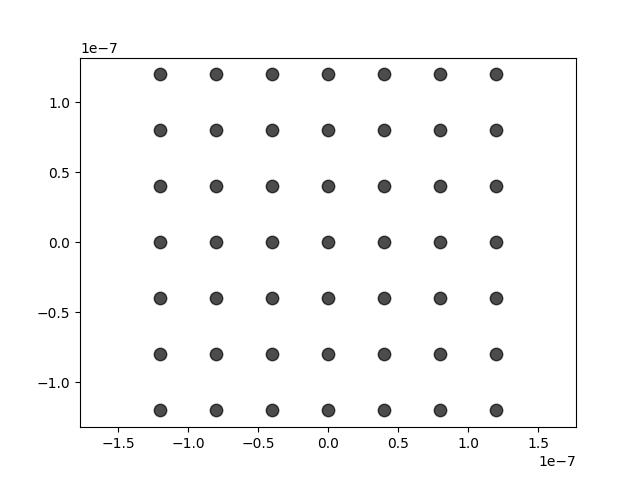

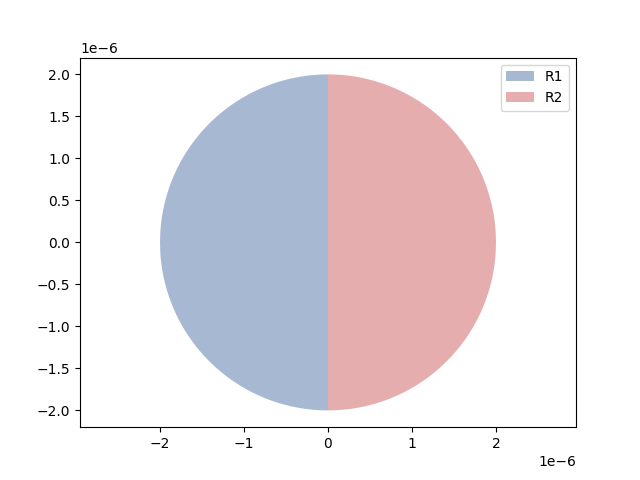

In [6]:
w      = 400 * (10 ** -9)
r1     = 5*w
r2     = -5*w
a      = .1 * w
points = np.array([[0,0],[a,0],[-a,0],[2*a,0],[3*a,0],[-2*a,0],[-3*a,0],[0,a],[0,2*a],[0,3*a],[0,-a],[0,-2*a],[0,-3*a],[a,a],[a,2*a],[a,3*a],[a,-a],[a,-2*a],[a,-3*a],[-a,a],[-a,2*a],[-a,3*a],[-a,-a],[-a,-2*a],[-a,-3*a],[2*a,a],[2*a,2*a],[2*a,3*a],[2*a,-a],[2*a,-2*a],[2*a,-3*a],[-2*a,a],[-2*a,2*a],[-2*a,3*a],[-2*a,-a],[-2*a,-2*a],[-2*a,-3*a],[3*a,a],[3*a,2*a],[3*a,3*a],[3*a,-a],[3*a,-2*a],[3*a,-3*a],[-3*a,a],[-3*a,2*a],[-3*a,3*a],[-3*a,-a],[-3*a,-2*a],[-3*a,-3*a]])
paraxial_aprox = (((1/r1) - (1/r2))) ** -1
print('posición aproximada del foco: ', paraxial_aprox, '||| a maximo: ',np.sqrt(25/18))

position_points(points)
len_draw(r1,r2,0)

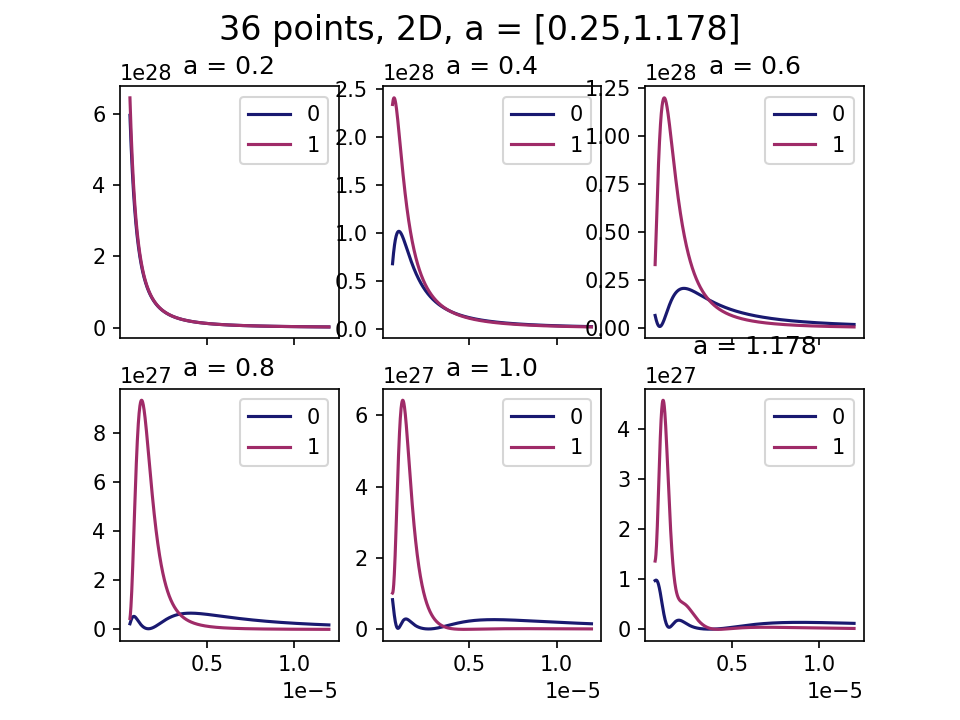

CPU times: user 3.88 s, sys: 536 ms, total: 4.41 s
Wall time: 3.82 s


In [7]:
%%time
zzz = np.linspace(1.5*w, 30*w, 1000)
z_plot_0 = np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*2,w,0,r1,r2)), dtype=float)
z_plot_1 = np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*2,w,1,r1,r2)), dtype=float)

fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, dpi=150)
ax[0,0].plot(zzz, z_plot_0, label="0", color="#191970")
ax[0,0].plot(zzz, z_plot_1, label="1", color="#9F2B68")
ax[0,0].legend()
ax[0,0].set_title("a = 0.2")

ax[0,1].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*4,w,0,r1,r2)), dtype=float), label="0", color="#191970")
ax[0,1].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*4,w,1,r1,r2)), dtype=float), label="1", color="#9F2B68")
ax[0,1].legend()
ax[0,1].set_title("a = 0.4")

ax[0,2].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*6,w,0,r1,r2)), dtype=float), label="0", color="#191970")
ax[0,2].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*6,w,1,r1,r2)), dtype=float), label="1", color="#9F2B68")
ax[0,2].legend()
ax[0,2].set_title("a = 0.6")

ax[1,0].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*8,w,0,r1,r2)), dtype=float), label="0", color="#191970")
ax[1,0].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*8,w,1,r1,r2)), dtype=float), label="1", color="#9F2B68")
ax[1,0].legend()
ax[1,0].set_title("a = 0.8")

ax[1,1].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*10,w,0,r1,r2)), dtype=float), label="0", color="#191970")
ax[1,1].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*10,w,1,r1,r2)), dtype=float), label="1", color="#9F2B68")
ax[1,1].legend()
ax[1,1].set_title("a = 1.0")

ax[1,2].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*11.78,w,0,r1,r2)), dtype=float), label="0", color="#191970")
ax[1,2].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*11.78,w,1,r1,r2)), dtype=float), label="1", color="#9F2B68")
ax[1,2].legend()
ax[1,2].set_title("a = 1.178")
#plt.xlim([1530,1570])
#plt.ylim([-40,1])
fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

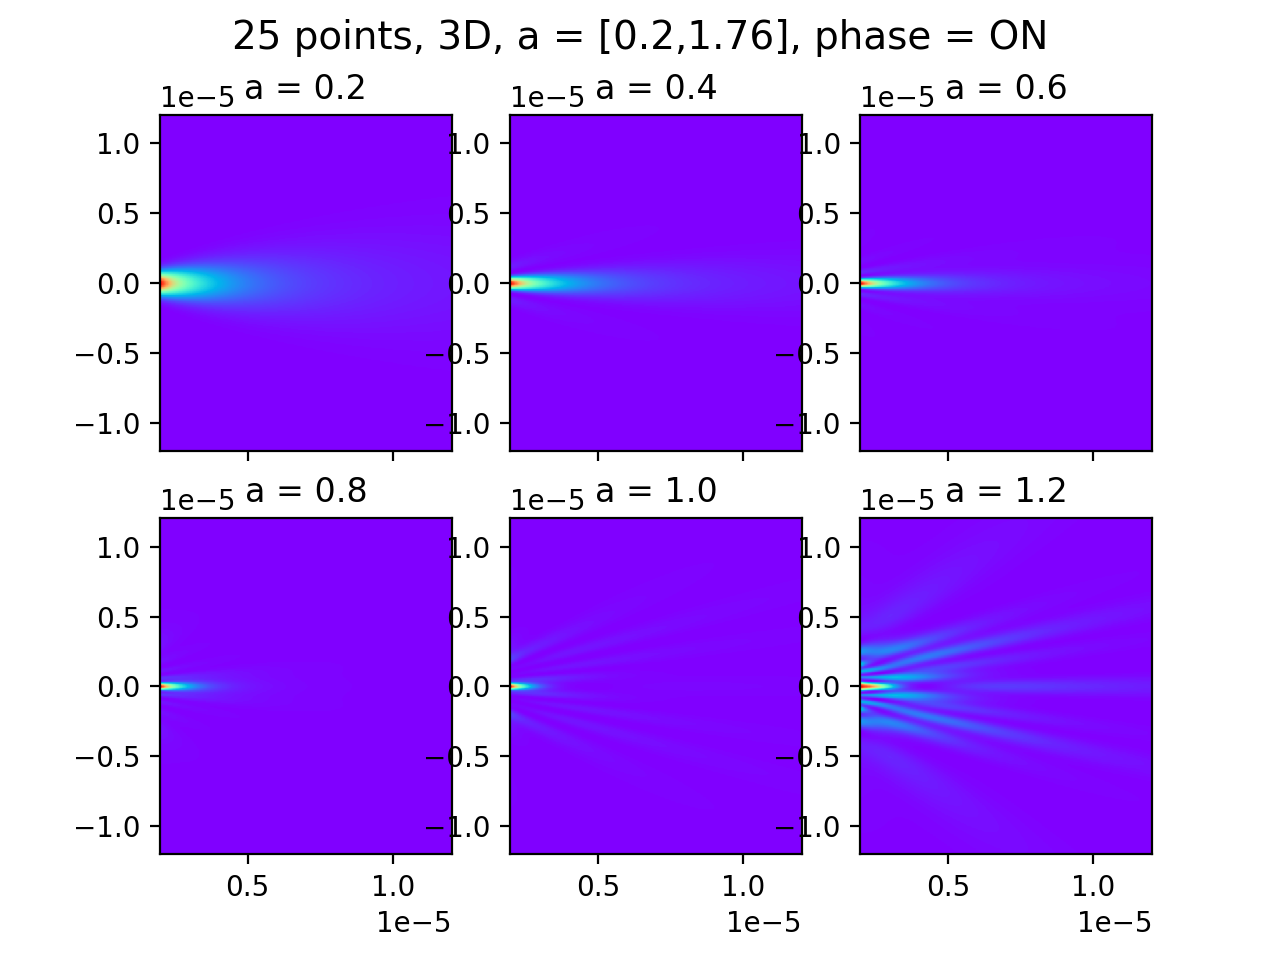

CPU times: user 3min 27s, sys: 1min 7s, total: 4min 34s
Wall time: 4min 34s


In [8]:
%%time
xx,zzz = np.meshgrid(np.linspace(-30*w, 30*w, 500), np.linspace(5*w, 30*w, 500))

fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, dpi=200)
z1 = np.array(list(GeometricPotencial_3D_reducido(xx,0,zzz,points*2,w,1,r1,r2)), dtype=float)
ax[0,0].pcolormesh(zzz, xx, z1, cmap='rainbow',  vmin = z1.min(), vmax = z1.max())
ax[0,0].set_title("a = 0.2")

z2 = np.array(list(GeometricPotencial_3D_reducido(xx,0,zzz,points*4,w,1,r1,r2)), dtype=float)
ax[0,1].pcolormesh(zzz, xx, z2, cmap='rainbow',  vmin = z2.min(), vmax = z2.max())
ax[0,1].set_title("a = 0.4")

z3 = np.array(list(GeometricPotencial_3D_reducido(xx,0,zzz,points*6,w,1,r1,r2)), dtype=float)
ax[0,2].pcolormesh(zzz, xx, z3, cmap='rainbow',  vmin = z3.min(), vmax = z3.max())
ax[0,2].set_title("a = 0.6")

z4 = np.array(list(GeometricPotencial_3D_reducido(xx,0,zzz,points*8,w,1,r1,r2)), dtype=float)
ax[1,0].pcolormesh(zzz, xx, z4, cmap='rainbow',  vmin = z4.min(), vmax = z4.max())
ax[1,0].set_title("a = 0.8")

z5 = np.array(list(GeometricPotencial_3D_reducido(xx,0,zzz,points*10,w,1,r1,r2)), dtype=float)
ax[1,1].pcolormesh(zzz, xx, z5, cmap='rainbow',  vmin = z5.min(), vmax = z5.max())
ax[1,1].set_title("a = 1.0")

z6 = np.array(list(GeometricPotencial_3D_reducido(xx,0,zzz,points*11.78,w,1,r1,r2)), dtype=float)
ax[1,2].pcolormesh(zzz, xx, z6, cmap='rainbow',  vmin = z6.min(), vmax = z6.max())
ax[1,2].set_title("a = 1.2")

#fig.colorbar(c, ax = ax)
fig.suptitle('25 points, 3D, a = [0.2,1.76], phase = ON', fontsize=14)
#plt.savefig("Confinamiento")
plt.show()

KeyboardInterrupt: 

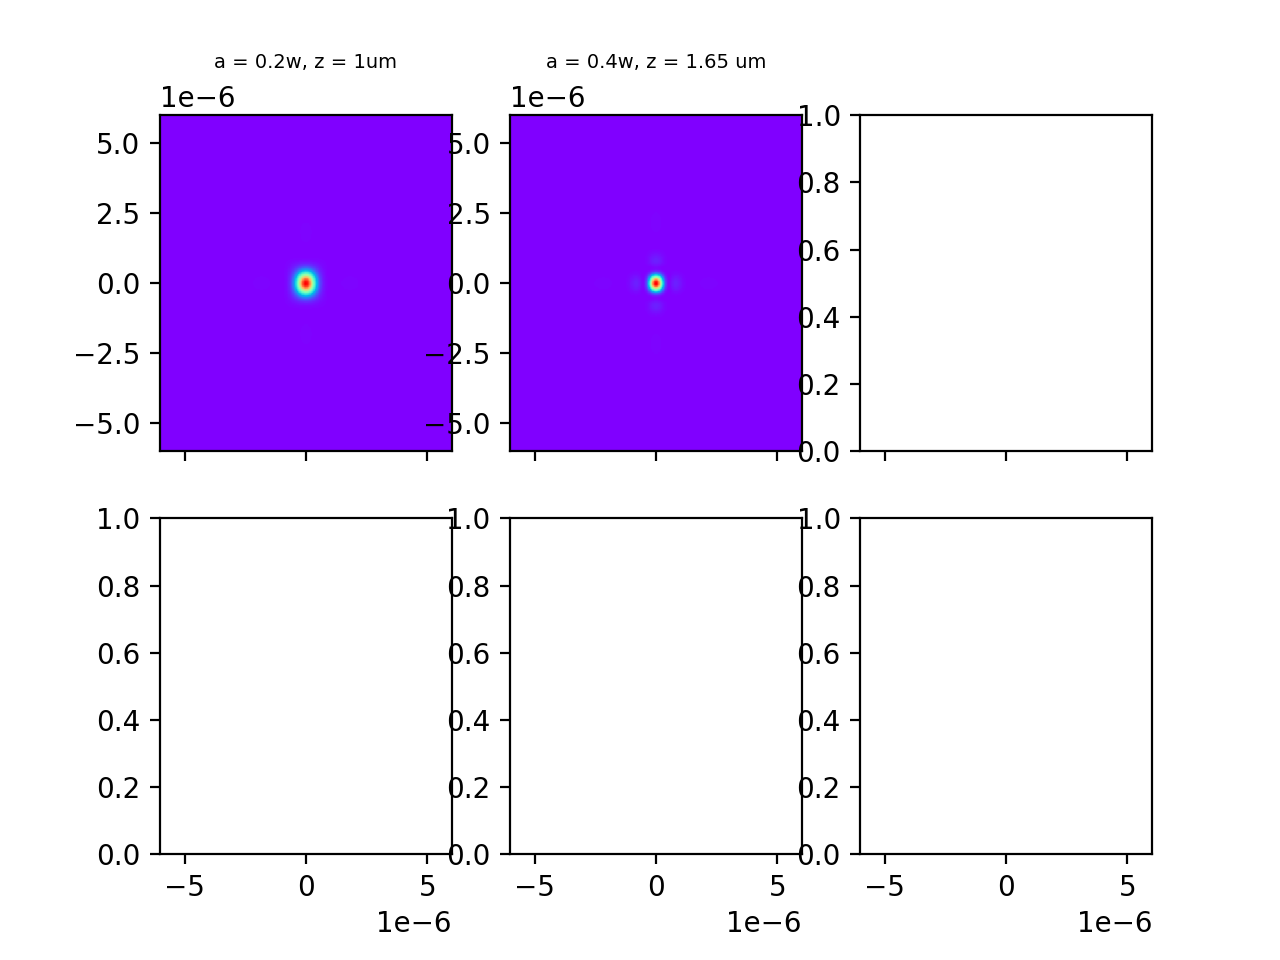

In [9]:
%%time
square = np.linspace(-15*w, 15*w, 500)
xx,yy = np.meshgrid(square, square)

fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, dpi=200)

z1 = np.array(list(GeometricPotencial_3D_reducido(xx,yy,1 * (10 ** -6),points*2,w,1,r1,r2)), dtype=float)
ax[0,0].pcolormesh(xx, yy, z1, cmap='rainbow',  vmin = z1.min(), vmax = z1.max())
ax[0,0].set_title("a = 0.2w, z = 1um", fontsize=7)

z2 = np.array(list(GeometricPotencial_3D_reducido(xx,yy,1.3 * (10 ** -6),points*4,w,1,r1,r2)), dtype=float)
ax[0,1].pcolormesh(xx, yy, z2, cmap='rainbow',  vmin = z2.min(), vmax = z2.max())
ax[0,1].set_title("a = 0.4w, z = 1.65 um", fontsize=7)

z3 = np.array(list(GeometricPotencial_3D_reducido(xx,yy,1.3 * (10 ** -6),points*6,w,1,r1,r2)), dtype=float)
ax[0,2].pcolormesh(xx, yy, z3, cmap='rainbow',  vmin = z3.min(), vmax = z3.max())
ax[0,2].set_title("a = 0.6w, z = 1.36 um", fontsize=7)

z4 = np.array(list(GeometricPotencial_3D_reducido(xx,yy,1.3 * (10 ** -6),points*8,w,1,r1,r2)), dtype=float)
ax[1,0].pcolormesh(xx, yy, z4, cmap='rainbow',  vmin = z4.min(), vmax = z4.max())
ax[1,0].set_title("a = 0.8w, z = 0.97 um", fontsize=7)

z5 = np.array(list(GeometricPotencial_3D_reducido(xx,yy,1.45 * (10 ** -6),points*10,w,1,r1,r2)), dtype=float)
ax[1,1].pcolormesh(xx, yy, z5, cmap='rainbow',  vmin = z5.min(), vmax = z5.max())
ax[1,1].set_title("a = 1.0w, z = 1.45 um", fontsize=7)

z6 = np.array(list(GeometricPotencial_3D_reducido(xx,yy,1.3 * (10 ** -6),points*11.78,w,1,r1,r2)), dtype=float)
ax[1,2].pcolormesh(xx, yy, z6, cmap='rainbow',  vmin = z6.min(), vmax = z6.max())
ax[1,2].set_title("a = 1.178w, z = 3.88 um", fontsize=7)

fig.suptitle('49 points, 3D, a = [0.2,1.178], phase = ON', fontsize=14)
plt.show()

KeyboardInterrupt: 

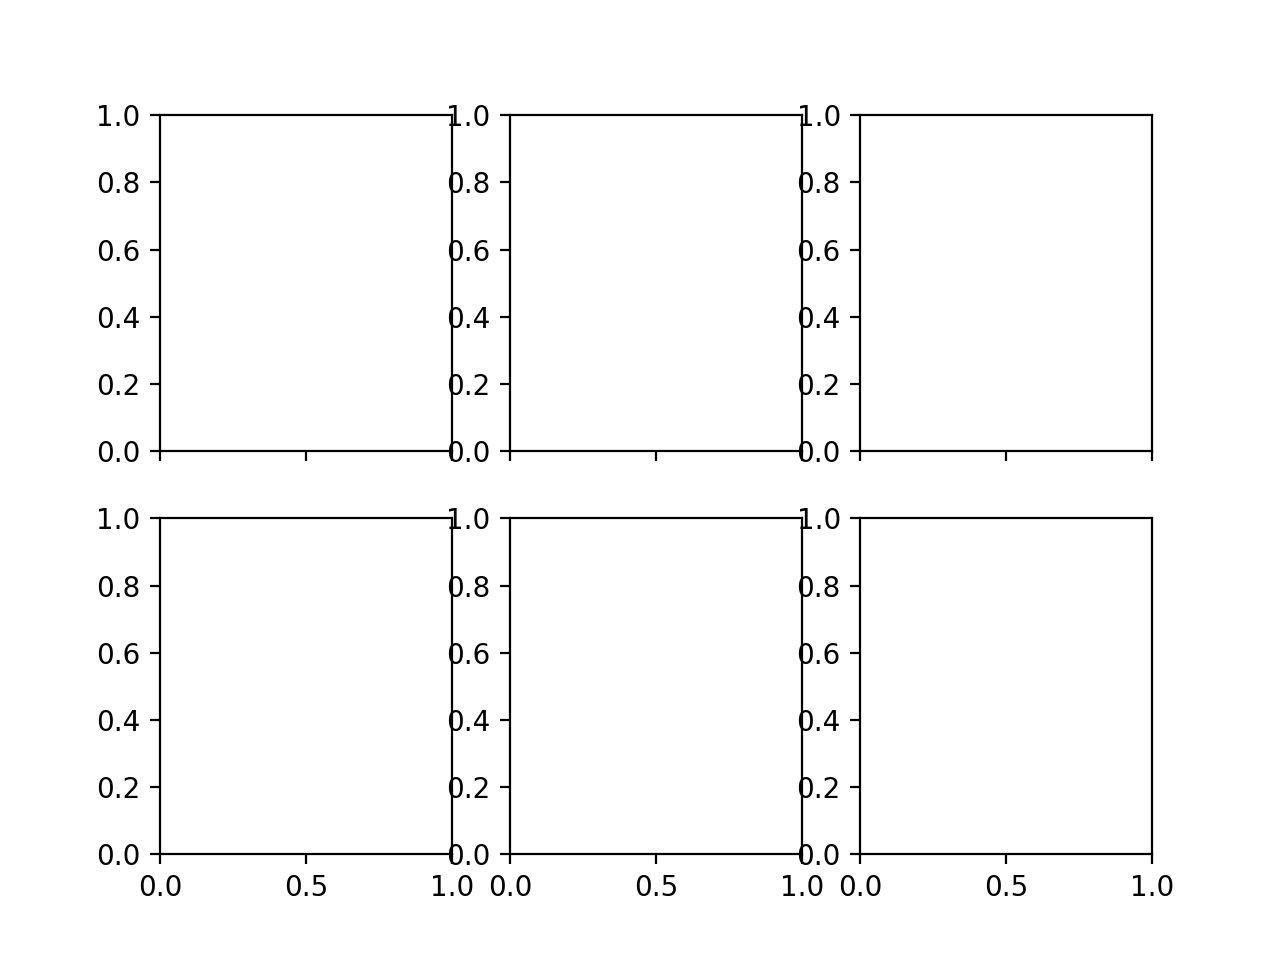

In [10]:
%%time
square = np.linspace(-15*w, 15*w, 500)
xx,yy = np.meshgrid(square, square)

fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, dpi=200)

z1 = np.array(list(GeometricPotencial_3D_reducido(xx,yy,1 * (10 ** -6),points*2,w,0,r1,r2)), dtype=float)
ax[0,0].pcolormesh(xx, yy, z1, cmap='rainbow',  vmin = z1.min(), vmax = z1.max())
ax[0,0].set_title("a = 0.2w, z = 1um", fontsize=13)

z2 = np.array(list(GeometricPotencial_3D_reducido(xx,yy,1.65 * (10 ** -6),points*4,w,0,r1,r2)), dtype=float)
ax[0,1].pcolormesh(xx, yy, z2, cmap='rainbow',  vmin = z2.min(), vmax = z2.max())
ax[0,1].set_title("a = 0.4w, z = 1.65 um", fontsize=13)

z3 = np.array(list(GeometricPotencial_3D_reducido(xx,yy,1.36 * (10 ** -6),points*6,w,0,r1,r2)), dtype=float)
ax[0,2].pcolormesh(xx, yy, z3, cmap='rainbow',  vmin = z3.min(), vmax = z3.max())
ax[0,2].set_title("a = 0.6w, z = 1.36 um", fontsize=13)

z4 = np.array(list(GeometricPotencial_3D_reducido(xx,yy,0.97 * (10 ** -6),points*8,w,0,r1,r2)), dtype=float)
ax[1,0].pcolormesh(xx, yy, z4, cmap='rainbow',  vmin = z4.min(), vmax = z4.max())
ax[1,0].set_title("a = 0.8w, z = 0.97 um", fontsize=13)

z5 = np.array(list(GeometricPotencial_3D_reducido(xx,yy,1.45 * (10 ** -6),points*10,w,0,r1,r2)), dtype=float)
ax[1,1].pcolormesh(xx, yy, z5, cmap='rainbow',  vmin = z5.min(), vmax = z5.max())
ax[1,1].set_title("a = 1.0w, z = 1.45 um", fontsize=13)

z6 = np.array(list(GeometricPotencial_3D_reducido(xx,yy,3.88 * (10 ** -6),points*11.78,w,0,r1,r2)), dtype=float)
ax[1,2].pcolormesh(xx, yy, z6, cmap='rainbow',  vmin = z6.min(), vmax = z6.max())
ax[1,2].set_title("a = 1.178w, z = 3.88 um", fontsize=13)

fig.suptitle('49 points, 3D, a = [0.2,1.178], phase = OFF', fontsize=14)
plt.show()

In [11]:
%%time
square = np.linspace(-15*w, 15*w, 500)
dz = 1.13 * (10 ** -6)
#dz = 7000*w
phase = 1
xx,yy = np.meshgrid(square, square)
zz = np.array(list(GeometricPotencial_3D_reducido(xx,yy,dz,points*5,w,1,r1,r2)), dtype=float)
#zz = zz[:-1, :-1]
z_mi, z_ma = zz.min()/1, zz.max()/1

fig, (ax) = plt.subplots(dpi=150, subplot_kw={'aspect': 'equal'})
c = ax.pcolormesh(xx, yy, zz, cmap='rainbow',  vmin = z_mi, vmax = z_ma)
fig.colorbar(c, ax = ax)
plt.savefig("Geometric Potencial_coherence")
plt.show()
dz

KeyboardInterrupt: 

In [12]:
%%time
square = np.linspace(-15*w, 15*w, 500)
dz = 1.3 * (10 ** -6)
#dz = 7000*w
phase = 1
xx,yy = np.meshgrid(square, square)
zz = np.array(list(GeometricPotencial_3D_reducido(xx,yy,dz,points*0.5,w,0,r1,r2)), dtype=float)
#zz = zz[:-1, :-1]
z_mi, z_ma = zz.min()/1, zz.max()/1

fig, (ax) = plt.subplots(dpi=150, subplot_kw={'aspect': 'equal'})
c = ax.pcolormesh(xx, yy, zz, cmap='rainbow',  vmin = z_mi, vmax = z_ma)
fig.colorbar(c, ax = ax)
plt.savefig("Geometric Potencial_coherence")
plt.show()
dz

KeyboardInterrupt: 

In [13]:
%%time
square = np.linspace(-15*w, 15*w, 500)
dz = 5*w
#dz = 7000*w
phase = 1
xx,yy = np.meshgrid(square, square)
zz = np.array(list(GeometricPotencial_3D_reducido(xx,yy,dz,points*11.68,w,0,r1,r2)), dtype=float)
#zz = zz[:-1, :-1]
z_mi, z_ma = zz.min()/1, zz.max()/1

fig, (ax) = plt.subplots(dpi=150, subplot_kw={'aspect': 'equal'})
c = ax.pcolormesh(xx, yy, zz, cmap='rainbow',  vmin = z_mi, vmax = z_ma)
fig.colorbar(c, ax = ax)
plt.savefig("Geometric Potencial_coherence")
plt.show()

KeyboardInterrupt: 